# TS12

Sintetizar un cuadripolo que cumpla con los siguientes parámetros:


$Y_{11} = \frac{I1}{V1} \bigg\rvert_{V_2=0} = \frac{3s.(s^2 + 7/3)}{ (s^2 + 2) (s^2 + 5) }$

$Y_{21} = \frac{I2}{V1} \bigg\rvert_{V_2=0} = \frac{s.(s^2 + 1)}{ (s^2 + 2) (s^2 + 5) }$

Para sintetizar este cuadripolo debemos tener en cuenta que si los parametros son calculados con $V_2=0$ entonces el ultimo elemento de la red no debe estar en derivacion.

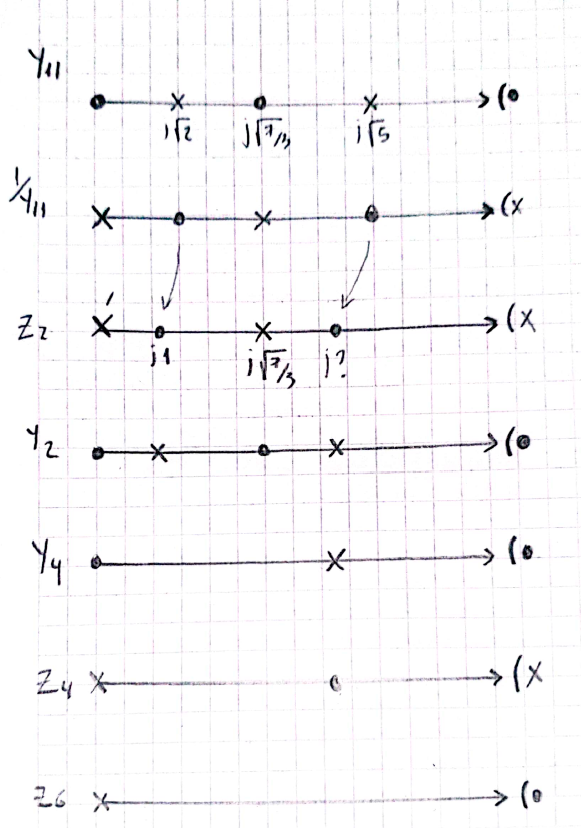

In [2]:
from sympy import  *
import numpy as np
from sympy.abc import s
from IPython.display import display, Math
import math as m


Y11 = (3*s**3 + 7*s)/(s**4 + 7*s**2 + 10)

Z1 = 1/Y11

ZC1 = 1/s

Z2 = cancel(Z1-ZC1)

display(Z2)

(s**4 + 4*s**2 + 3)/(3*s**3 + 7*s)

In [3]:
Y2 = 1/Z2

K2 = 1

Y_LC = 2*K2*s/(s**2 + 1)

Y4 = Y2 - Y_LC #remuevo el 1er tanque

Z4 = 1/Y4

display(simplify(Z4))

s + 3/s

Este ultimo es un inductor y un capacitor en serie.

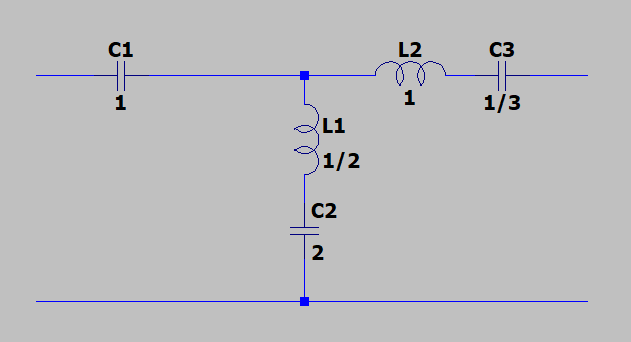

Ahora verificamos:

In [4]:
C1 = 1
C2 = 2
C3 = Rational('1/3')
L1 = Rational('1/2')
L2 = 1

ZA = 1/(s*C1)
ZB = s*L1 + 1/(s*C2) 
ZC = s*L2 + 1/(s*C3) 

Z = Matrix([[ZA + ZB,ZB],[ZB , ZB + ZC]])

YP = s*C2/(1 + L1*C2*s**2) + s*C3/(1 + L2*C3*s**2)# Y formado por ambos tanques

Y_11 = cancel(Z[3]/det(Z))

Y_21 = cancel(-Z[2]/det(Z))

display("Y11",Y_11)
display("Y21",Y_21)

'Y11'

(3*s**3 + 7*s)/(s**4 + 7*s**2 + 10)

'Y21'

(-s**3 - s)/(s**4 + 7*s**2 + 10)

Vemos que ambas son correctas

## Parte 2

$T(s) = \frac{V2}{V1} \bigg\rvert_{I_2=0} = \frac{k.(s + 1)}{ (s + 2) (s + 4) }$

Obtener la topología circuital que respeta la transferencia solicitada, utilizando parámetros Z e Y

Sabemos que:

$T(s) = \frac{V2}{V1} \bigg\rvert_{I_2=0} = \frac{k.(s + 1)}{ (s + 2) (s + 4) } = \frac{Z_{21}}{Z_{11}} = \frac{-Y_{21}}{Y_{22}}$

Dividimos numerador y denominador por $D(s)$ para asi obtener los distintos parametros Z o Y.
Decido hacerlo RC.

Como la transferencia se calcula con $I_2 = 0$, se debe tener al ultimo elemento en derivacion, y como lo que se fuerza es un tension $V_1$, el primer elemento debe estar en serie.

Decido ir por los parametros Z y determino $D(s)$. Para ello se debe tener en cuenta que para $Z_{RC}$: $Z(0) > Z(\infty)$

Propongo $D(s) = s(s+3)$

$Z_{11} = \frac{ (s + 2) (s + 4)}{s(s+3)}$

$Z_{21} = \frac{ K(s + 1)}{s(s+3)}$

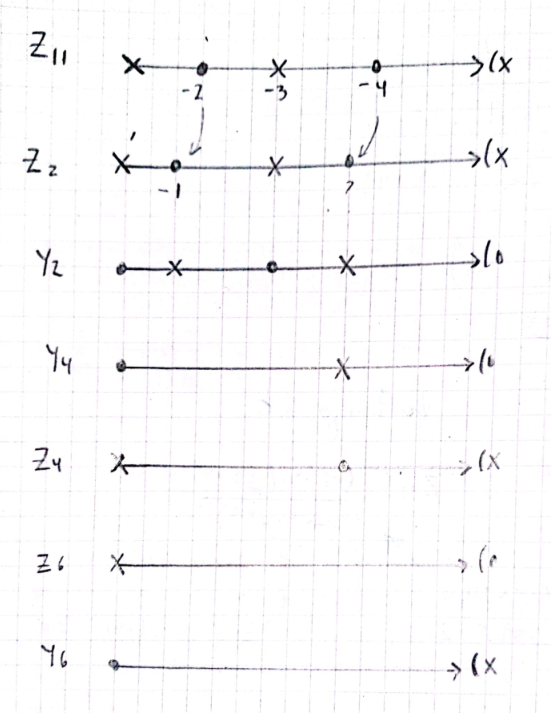

In [27]:
x1 = Rational('-3/2')#esta mal porque es una resistencia negativa

Z11 = (s+2)*(s+4)/(s*(s+3))

ZR1 = x1#Resistencia en serie

Z2 = simplify(Z11-ZR1)

display('Z2',Z2)

'Z2'

(5*s**2 + 21*s + 16)/(2*s*(s + 3))

In [20]:
Y2 = 1/Z2

k1 = Rational('4/11')#Calculado con el limite
YRC1 = s*k1/(s+1)

Y4 = simplify(Y2 - YRC1)

display('Y4',Y4)

'Y4'

2*s/(11*(5*s + 16))

In [21]:
Z4 = 1/Y4

#Remuevo el polo en infinito

k_inf = Rational('2/55')

Z6 = simplify(Z4-k_inf)

display('Z6',Z6)

'Z6'

3021/110 + 88/s

In [22]:
#Necesito que el ultimo elemento este en derivacion
#Remuevo el capacitor en serie y me queda una resistencia en derivacion

Z8 = Z6 - 88/s

Y8 = 1/Z8

display(simplify(Y8))
    
    

110/3021

In [3]:
x1 = Rational('3/2')

Z11 = (s+2)*(s+4)/((s+x1)*(s+3))

ZR1 = 3#Resistencia en serie

Z2 = simplify(Z11-ZR1)

display('Z2',Z2)

'Z2'

(-4*s**2 - 15*s - 11)/(2*s**2 + 9*s + 9)